In [145]:
class Para:
    data_in_sample_path = 'data/sk_space_1d_rate_20d_12-21_pre/0.csv'
    data_test_path = 'data/sk_space_1d_rate_20d_22-22_pre/0.csv'

    feature_column_start_name = 'ep_ratio_ttm'
    feature_column_end_name = 'BR'

    percent_cv = 0.1

para = Para()

## 构建训练集与交叉验证集

In [146]:
import pandas as pd
import numpy as np

data_in_sample = pd.read_csv(para.data_in_sample_path)

data_in_sample = data_in_sample.dropna(axis=0)

data_in_sample.insert(loc=0, column='return_bin', value=np.nan)

data_in_sample.loc[data_in_sample['yield_rate'] > 0, 'return_bin'] = 0
data_in_sample.loc[data_in_sample['yield_rate'] <= 0, 'return_bin'] = 1

data_in_sample['return_bin'] = data_in_sample['return_bin'].astype(np.int64)

In [147]:
data_in_sample.dtypes

return_bin         int64
order_book_id     object
board_type        object
sector_code       object
month              int64
date              object
yield_rate       float64
ep_ratio_ttm     float64
pb_ratio_ttm     float64
sp_ratio_ttm     float64
MACD_DIFF        float64
MACD_DEA         float64
MACD_HIST        float64
RSI10            float64
SY               float64
BIAS20           float64
VOL30            float64
VOL60            float64
VOL120           float64
VOLT20           float64
VOLT60           float64
AR               float64
BR               float64
dtype: object

In [148]:
data_in_sample

,return_bin,order_book_id,board_type,sector_code,month,date,yield_rate,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
0,1,600376.XSHG,MainBoard,RealEstate,0,2012-01-04,-0.141230,-1.524457,0.643879,-1.212339,...,0.538128,1.224282,0.934854,0.186499,0.250212,0.183803,-0.329742,-0.644819,2.494509,1.125687
1,0,600376.XSHG,MainBoard,RealEstate,1,2012-01-05,0.253379,-1.500471,0.570059,-1.201655,...,0.330607,1.224282,0.417093,0.217907,0.263290,0.180967,-0.340798,-0.635916,2.293300,0.968585
2,0,600376.XSHG,MainBoard,RealEstate,2,2012-01-06,0.749352,-1.503539,0.579287,-1.203022,...,0.650744,1.224282,0.428205,0.211118,0.248994,0.178574,-0.338216,-0.627350,1.857657,0.677275
3,0,600376.XSHG,MainBoard,RealEstate,3,2012-01-09,0.065030,-1.536937,0.683865,-1.217897,...,0.743422,1.224282,0.985446,0.229623,0.245450,0.177982,-0.305186,-0.609930,1.762400,0.498572
4,1,600376.XSHG,MainBoard,RealEstate,4,2012-01-10,-0.213278,-1.564457,0.776140,-1.230155,...,0.650744,1.224282,1.428671,0.267379,0.249163,0.186044,-0.233927,-0.574659,2.099490,0.715619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,0,600376.XSHG,MainBoard,RealEstate,2406,2021-11-29,1.462886,1.657715,-1.359218,3.640367,...,-0.065573,-0.882930,0.052101,-0.646078,-0.707748,-0.780226,-1.025460,-0.470301,-1.132233,-1.416920
2385,0,600376.XSHG,MainBoard,RealEstate,2407,2021-11-30,1.647394,1.683664,-1.364536,3.640367,...,-0.143578,-0.882930,-0.060633,-0.653847,-0.708004,-0.780349,-1.031112,-0.460610,-0.648826,-0.976654
2386,0,600376.XSHG,MainBoard,RealEstate,2408,2021-12-01,1.530037,1.632091,-1.353900,3.640367,...,0.447523,-0.180526,0.148899,-0.655539,-0.708258,-0.779669,-1.028788,-0.454117,-0.258064,-0.658283
2387,0,600376.XSHG,MainBoard,RealEstate,2409,2021-12-02,1.484967,1.565309,-1.339718,3.599144,...,0.917404,-0.180526,0.403522,-0.652971,-0.707706,-0.778008,-0.992226,-0.452088,0.532003,-0.119379


In [149]:
from sklearn.model_selection import train_test_split

X_in_sample = data_in_sample.loc[:, para.feature_column_start_name: para.feature_column_end_name]
y_in_sample = data_in_sample.loc[:, 'return_bin']

X_train, X_cv, y_train, y_cv = train_test_split(X_in_sample, y_in_sample, test_size=para.percent_cv, shuffle=False)

X_train

,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,MACD_DIFF,MACD_DEA,MACD_HIST,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
0,-1.524457,0.643879,-1.212339,0.965225,0.697316,0.990854,0.538128,1.224282,0.934854,0.186499,0.250212,0.183803,-0.329742,-0.644819,2.494509,1.125687
1,-1.500471,0.570059,-1.201655,0.896273,0.745902,0.605944,0.330607,1.224282,0.417093,0.217907,0.263290,0.180967,-0.340798,-0.635916,2.293300,0.968585
2,-1.503539,0.579287,-1.203022,0.840603,0.773069,0.333522,0.650744,1.224282,0.428205,0.211118,0.248994,0.178574,-0.338216,-0.627350,1.857657,0.677275
3,-1.536937,0.683865,-1.217897,0.889795,0.805143,0.395923,0.743422,1.224282,0.985446,0.229623,0.245450,0.177982,-0.305186,-0.609930,1.762400,0.498572
4,-1.564457,0.776140,-1.230155,1.008477,0.855748,0.631619,0.650744,1.224282,1.428671,0.267379,0.249163,0.186044,-0.233927,-0.574659,2.099490,0.715619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,-0.243384,-1.009849,1.050885,-0.230040,-0.284554,0.118673,-0.350847,-0.882930,-0.151494,-0.772571,-0.707969,-0.698921,-1.008562,-0.377083,-0.982731,0.303978
2146,-0.239937,-1.011728,1.055094,-0.231966,-0.276739,0.087384,-0.350847,-1.585334,-0.178863,-0.772718,-0.708999,-0.699805,-1.011489,-0.369160,-0.830266,0.417762
2147,-0.190519,-1.038037,1.115448,-0.273718,-0.279262,-0.044115,-1.053790,-1.585334,-0.519861,-0.770928,-0.709570,-0.700236,-0.934769,-0.355120,-0.675094,0.659123
2148,-0.186903,-1.039916,1.119863,-0.306850,-0.288245,-0.126274,-0.928130,-1.585334,-0.524438,-0.771887,-0.712030,-0.701534,-0.872603,-0.341957,-0.733134,0.823248


## 构建测试集

In [150]:
import pandas as pd
import numpy as np

data_test = pd.read_csv(para.data_test_path)

data_test = data_test.dropna(axis=0)

data_test.insert(loc=0, column='return_bin', value=np.nan)

data_test.loc[data_test['yield_rate'] > 0, 'return_bin'] = 0
data_test.loc[data_test['yield_rate'] <= 0, 'return_bin'] = 1

data_test['return_bin'] = data_test['return_bin'].astype(np.int64)

In [151]:
data_test.dtypes

return_bin         int64
order_book_id     object
board_type        object
sector_code       object
month              int64
date              object
yield_rate       float64
ep_ratio_ttm     float64
pb_ratio_ttm     float64
sp_ratio_ttm     float64
MACD_DIFF        float64
MACD_DEA         float64
MACD_HIST        float64
RSI10            float64
SY               float64
BIAS20           float64
VOL30            float64
VOL60            float64
VOL120           float64
VOLT20           float64
VOLT60           float64
AR               float64
BR               float64
dtype: object

In [152]:
data_test

,return_bin,order_book_id,board_type,sector_code,month,date,yield_rate,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
0,0,600376.XSHG,MainBoard,RealEstate,0,2022-01-04,2.150414,0.885993,-0.904836,0.885993,...,0.584014,0.563670,0.736664,0.589693,0.984890,-2.406332,0.333570,-2.223795,0.653695,0.949237
1,0,600376.XSHG,MainBoard,RealEstate,1,2022-01-05,1.379074,0.014344,-0.044409,0.014344,...,0.260424,1.395753,1.165683,0.777085,1.253139,-1.980971,-0.217059,-1.976358,1.509365,1.592895
2,0,600376.XSHG,MainBoard,RealEstate,2,2022-01-06,1.793948,0.127999,-0.159133,0.127999,...,0.603361,1.395753,0.907695,0.847909,1.395975,-1.812021,-0.870438,-1.743586,1.467776,1.639934
3,0,600376.XSHG,MainBoard,RealEstate,3,2022-01-07,1.119903,-0.487725,0.471847,-0.487725,...,1.629346,1.395753,1.258799,0.960404,1.644152,-1.563709,-0.317418,-1.445352,1.725487,1.953677
4,0,600376.XSHG,MainBoard,RealEstate,4,2022-01-10,0.744371,-0.210673,0.185038,-0.210673,...,1.296049,1.395753,0.947061,1.039450,1.498971,-1.378603,-0.103479,-1.236502,0.736792,1.220539
5,1,600376.XSHG,MainBoard,RealEstate,5,2022-01-11,-0.262400,-0.974956,0.988103,-0.974956,...,1.537822,1.395753,1.389042,1.155654,1.594796,-1.084856,0.373692,-0.953711,1.452116,1.654475
6,1,600376.XSHG,MainBoard,RealEstate,6,2022-01-12,-0.676498,-1.344069,1.389636,-1.344069,...,1.544884,1.395753,1.525159,1.316973,1.578428,-0.818150,0.851443,-0.590917,1.362333,1.394781
7,1,600376.XSHG,MainBoard,RealEstate,7,2022-01-13,-0.985707,-1.551249,1.619083,-1.551249,...,1.564968,1.395753,1.534517,1.368277,1.602327,-0.643695,1.282435,-0.223983,1.231482,1.078255
8,1,600376.XSHG,MainBoard,RealEstate,8,2022-01-14,-0.357573,-1.239467,1.274912,-1.239467,...,1.223820,1.395753,1.166906,1.325482,1.625601,-0.468134,1.508347,0.080129,0.842428,0.758957
9,1,600376.XSHG,MainBoard,RealEstate,9,2022-01-17,-0.072861,-1.134181,1.160188,-1.134181,...,1.223820,0.563670,0.951968,1.307809,0.853988,-0.295579,1.498436,0.264770,0.468502,0.108179


In [153]:
X_test = data_test.loc[:, para.feature_column_start_name: para.feature_column_end_name]
y_test = data_test.loc[:, 'return_bin']

X_test

,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,MACD_DIFF,MACD_DEA,MACD_HIST,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
0,0.885993,-0.904836,0.885993,0.509815,0.371793,0.695278,0.584014,0.563670,0.736664,0.589693,0.984890,-2.406332,0.333570,-2.223795,0.653695,0.949237
1,0.014344,-0.044409,0.014344,0.642553,0.409583,0.997898,0.260424,1.395753,1.165683,0.777085,1.253139,-1.980971,-0.217059,-1.976358,1.509365,1.592895
2,0.127999,-0.159133,0.127999,0.706257,0.457539,1.081687,0.603361,1.395753,0.907695,0.847909,1.395975,-1.812021,-0.870438,-1.743586,1.467776,1.639934
3,-0.487725,0.471847,-0.487725,0.826973,0.529490,1.279456,1.629346,1.395753,1.258799,0.960404,1.644152,-1.563709,-0.317418,-1.445352,1.725487,1.953677
4,-0.210673,0.185038,-0.210673,0.853349,0.594390,1.221338,1.296049,1.395753,0.947061,1.039450,1.498971,-1.378603,-0.103479,-1.236502,0.736792,1.220539
5,-0.974956,0.988103,-0.974956,0.968950,0.678474,1.379447,1.537822,1.395753,1.389042,1.155654,1.594796,-1.084856,0.373692,-0.953711,1.452116,1.654475
6,-1.344069,1.389636,-1.344069,1.092924,0.780233,1.525136,1.544884,1.395753,1.525159,1.316973,1.578428,-0.818150,0.851443,-0.590917,1.362333,1.394781
7,-1.551249,1.619083,-1.551249,1.196240,0.890387,1.594316,1.564968,1.395753,1.534517,1.368277,1.602327,-0.643695,1.282435,-0.223983,1.231482,1.078255
8,-1.239467,1.274912,-1.239467,1.196175,0.978491,1.412590,1.223820,1.395753,1.166906,1.325482,1.625601,-0.468134,1.508347,0.080129,0.842428,0.758957
9,-1.134181,1.160188,-1.134181,1.149521,1.035994,1.160374,1.223820,0.563670,0.951968,1.307809,0.853988,-0.295579,1.498436,0.264770,0.468502,0.108179


In [154]:
y_test

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    0
29    0
30    0
Name: return_bin, dtype: int64

## 训练模型

In [155]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
import pandas as pd

index = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
columns = [2, 3, 4, 5, 6, 7, 8]

train_accuracy_df = pd.DataFrame(index=index, columns=columns, dtype=np.float64)
train_accuracy_df.index.name = 'subsample'
train_accuracy_df.columns.name = 'max_depth'

cv_accuracy_df = pd.DataFrame(index=index, columns=columns, dtype=np.float64)
cv_accuracy_df.index.name = 'subsample'
cv_accuracy_df.columns.name = 'max_depth'

test_accuracy_df = pd.DataFrame(index=index, columns=columns, dtype=np.float64)
test_accuracy_df.index.name = 'subsample'
test_accuracy_df.columns.name = 'max_depth'

for subsample in index:
    for max_depth in columns:

        model = xgb.XGBClassifier(
            subsample=subsample,
            max_depth=max_depth,
            objective="binary:logistic",
            use_label_encoder=False,
            eval_metric="logloss",
        )

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_cv_pred = model.predict(X_cv)
        y_test_pred = model.predict(X_test)

        train_accuracy_df.loc[subsample, max_depth] = accuracy_score(y_train, y_train_pred)
        cv_accuracy_df.loc[subsample, max_depth] = accuracy_score(y_cv, y_cv_pred)
        test_accuracy_df.loc[subsample, max_depth] = accuracy_score(y_test, y_test_pred)

        # print(subsample, max_depth)
        # print(type(train_accuracy_df.loc[subsample, max_depth]))

In [156]:
train_accuracy_df.dtypes

max_depth
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
dtype: object

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df: pd.DataFrame, df_name):
    sns.heatmap(
        data=df,
        xticklabels=df.columns.values,
        yticklabels=df.index.values,
        annot=True,
        cmap='YlGnBu'
    )

    plt.xlabel(xlabel='max_depth')
    plt.ylabel(ylabel='subsample')
    plt.title(label=df_name)

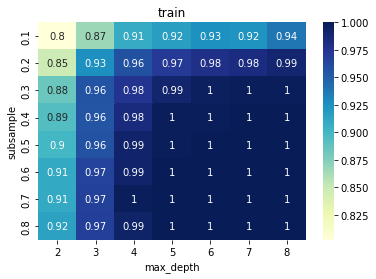

In [158]:
plot_heatmap(train_accuracy_df, 'train')

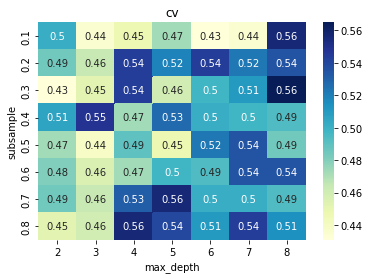

In [159]:
plot_heatmap(cv_accuracy_df, 'cv')

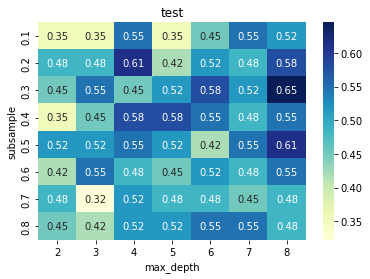

In [160]:
plot_heatmap(test_accuracy_df, 'test')